In [1]:
# Cell 1: Import Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import lightgbm as lgb
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
# ============================================
# Cell 2: Load Data
# Update this path for your Kaggle environment
df = pd.read_csv('workout_fitness_tracker_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (10000, 20)

Column names:
['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout']

First 5 rows:


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [4]:
# ============================================
# Cell 3: Data Types and Basic Info
print("Data types:")
print(df.dtypes)
print("\nDataset info:")
df.info()

Data types:
User ID                       int64
Age                           int64
Gender                       object
Height (cm)                   int64
Weight (kg)                   int64
Workout Type                 object
Workout Duration (mins)       int64
Calories Burned               int64
Heart Rate (bpm)              int64
Steps Taken                   int64
Distance (km)               float64
Workout Intensity            object
Sleep Hours                 float64
Water Intake (liters)       float64
Daily Calories Intake         int64
Resting Heart Rate (bpm)      int64
VO2 Max                     float64
Body Fat (%)                float64
Mood Before Workout          object
Mood After Workout           object
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID         

In [5]:
# ============================================
# Cell 4: Check Missing Values and Data Quality
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nNo missing values found!")

# Check for constant columns
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)
        print(f"\nWarning: {col} has only one unique value: {df[col].unique()[0]}")

print(f"\nConstant columns found: {constant_cols}")


Missing values per column:
Series([], dtype: int64)

No missing values found!




Constant columns found: ['Water Intake (liters)', 'VO2 Max', 'Body Fat (%)']


In [6]:
#============================================
# Cell 5: Basic Statistics
# Describe numeric columns
print("Basic Statistics for Numeric Columns:")
df.describe()

Basic Statistics for Numeric Columns:


,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.109529e-14,717.109026,11.566763,4.590336e-12,0.0
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5


In [7]:
# ============================================
# Cell 6: Categorical Variables Distribution
categorical_cols = ['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout', 'Mood After Workout']

print("Categorical Variables Distribution:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Categorical Variables Distribution:

Gender:
Gender
Other     3392
Male      3370
Female    3238
Name: count, dtype: int64

Workout Type:
Workout Type
HIIT        1731
Strength    1667
Yoga        1666
Cycling     1656
Cardio      1645
Running     1635
Name: count, dtype: int64

Workout Intensity:
Workout Intensity
Low       3357
Medium    3323
High      3320
Name: count, dtype: int64

Mood Before Workout:
Mood Before Workout
Tired       2553
Happy       2511
Neutral     2511
Stressed    2425
Name: count, dtype: int64

Mood After Workout:
Mood After Workout
Neutral      3356
Energized    3323
Fatigued     3321
Name: count, dtype: int64


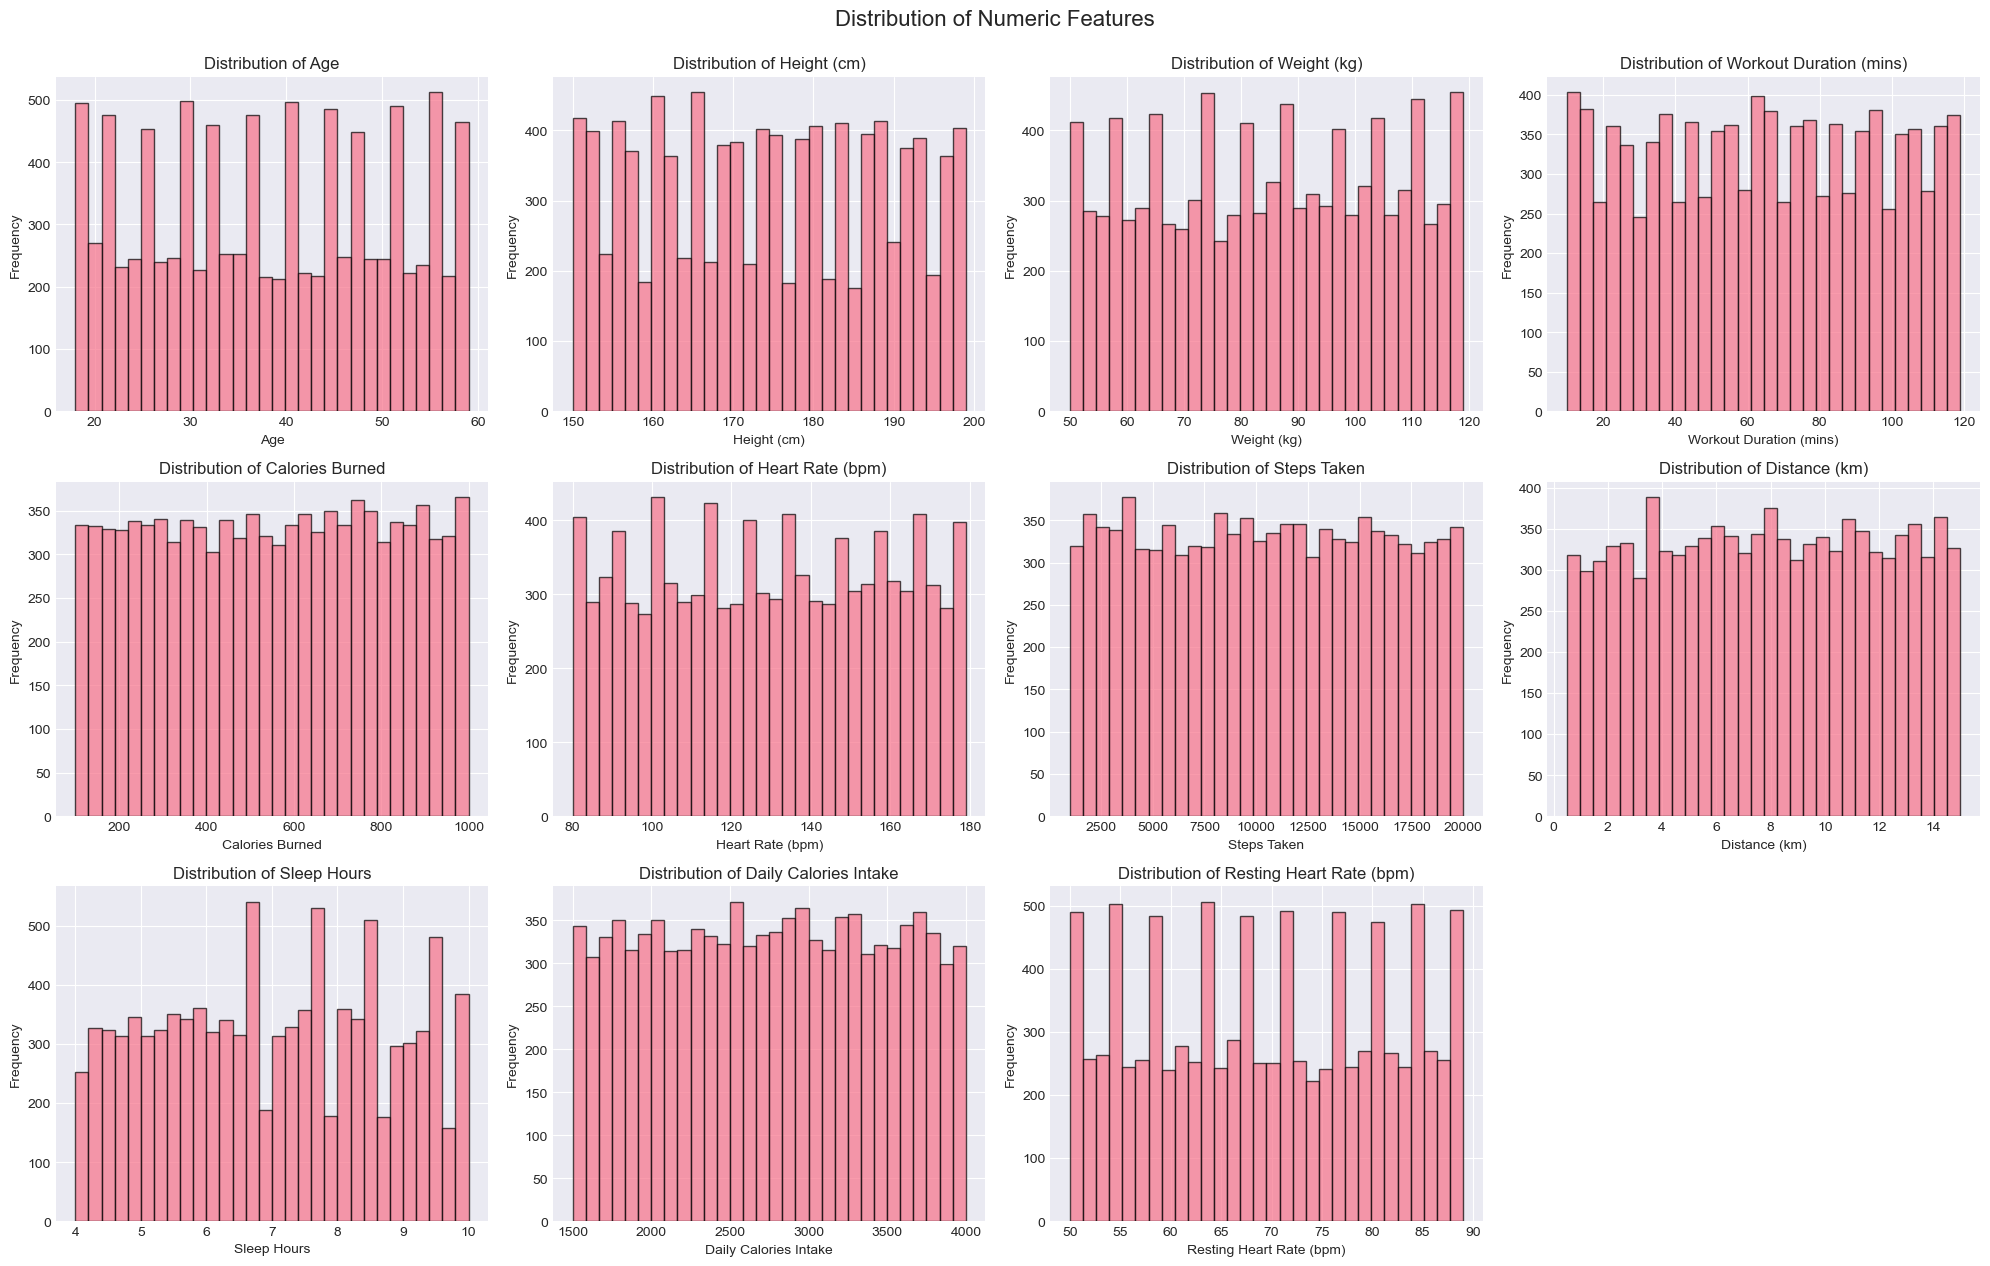

In [8]:
# ============================================
# Cell 7: Visualize Numeric Features Distribution
# Create figure for distributions
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(['User ID'] + constant_cols)

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

# Hide unused subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution of Numeric Features', y=1.02, fontsize=16)
plt.show()


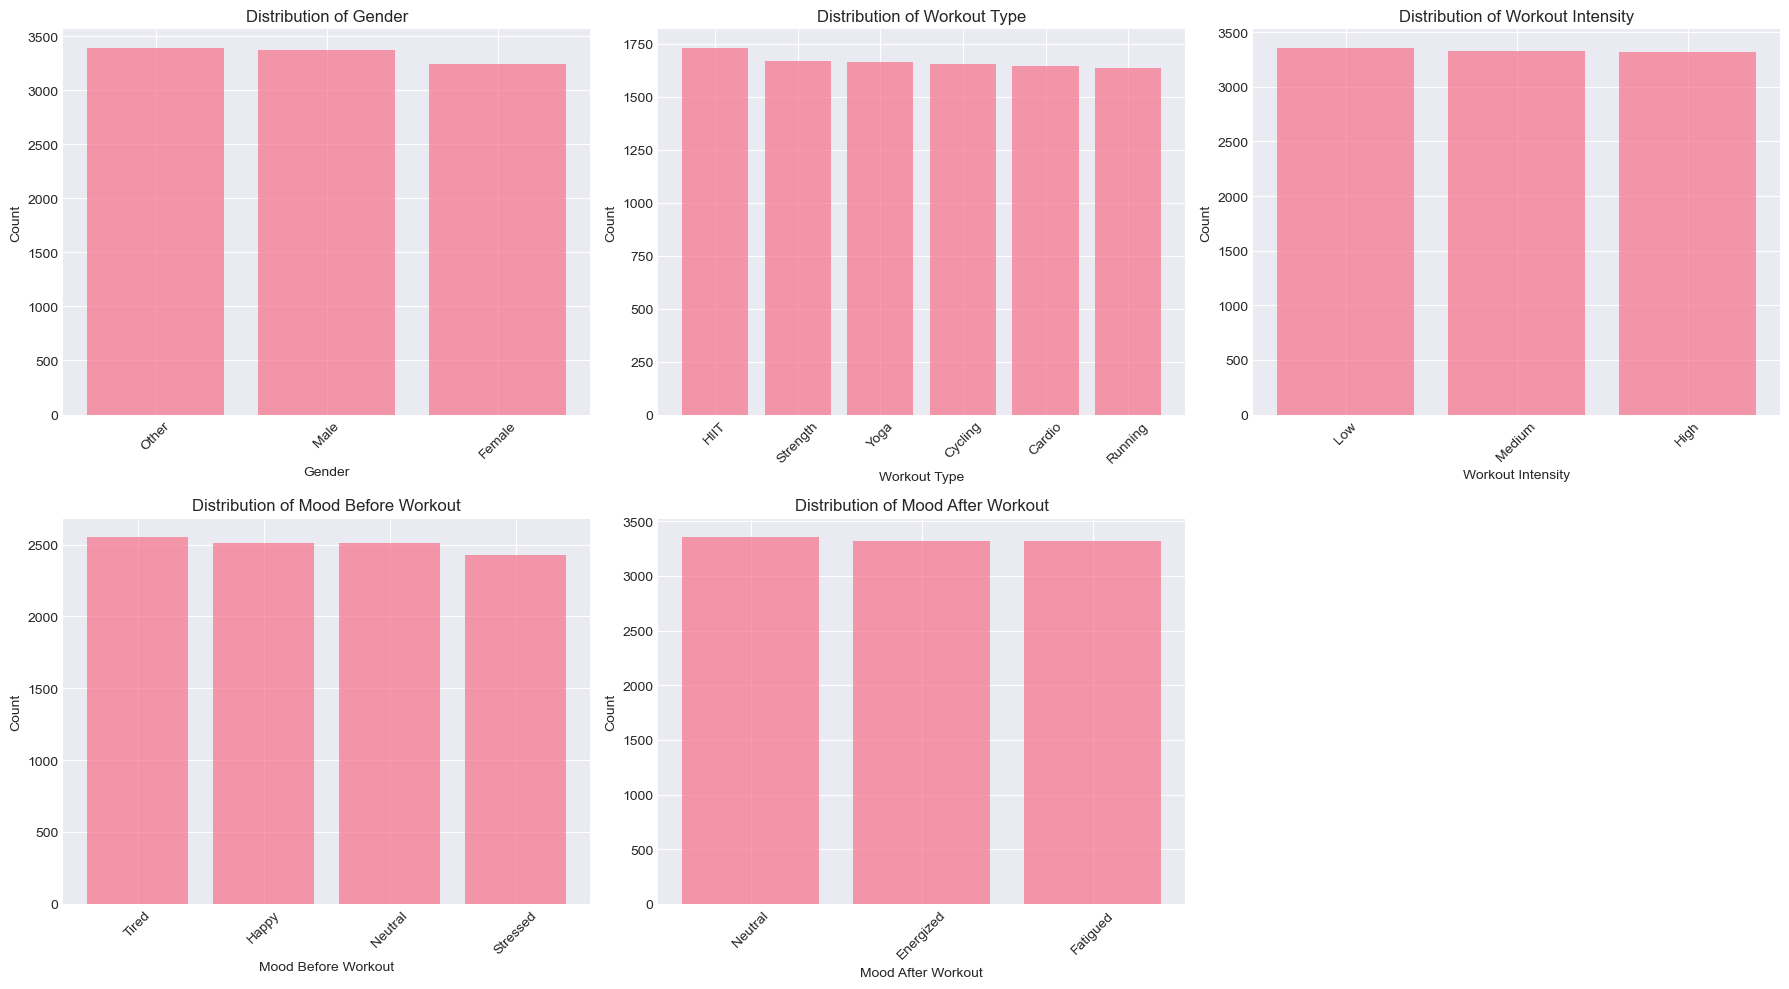

In [9]:
# ============================================
# Cell 8: Visualize Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide the last subplot if we have odd number of plots
if len(categorical_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


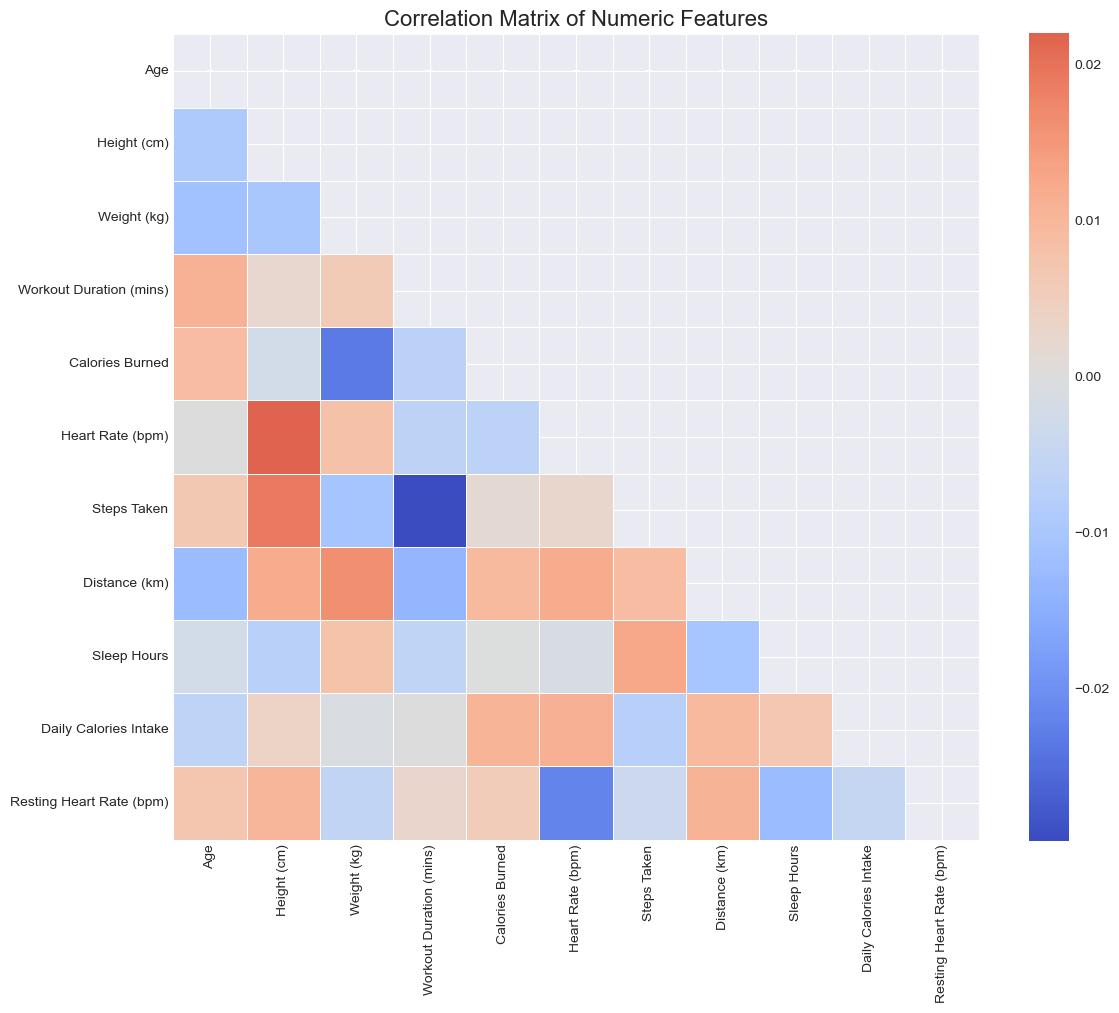

Highly correlated feature pairs (|correlation| > 0.7):


In [10]:
# ============================================
# Cell 9: Correlation Analysis
# Remove constant columns and User ID for correlation
correlation_cols = [col for col in numeric_cols if col not in constant_cols]
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# Find highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))

print("Highly correlated feature pairs (|correlation| > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


In [11]:
# Cell 10: Feature Engineering (FIXED VERSION)
# Create a copy for feature engineering
df_fe = df.copy()

# Drop constant columns
df_fe = df_fe.drop(columns=constant_cols)
print(f"Dropped constant columns: {constant_cols}")

# Create BMI feature
df_fe['BMI'] = df_fe['Weight (kg)'] / (df_fe['Height (cm)'] / 100) ** 2

# Create efficiency metrics
df_fe['Calories_per_minute'] = df_fe['Calories Burned'] / df_fe['Workout Duration (mins)']
df_fe['Steps_per_km'] = df_fe['Steps Taken'] / df_fe['Distance (km)']
df_fe['Heart_rate_intensity'] = df_fe['Heart Rate (bpm)'] / df_fe['Resting Heart Rate (bpm)']

# Create fitness score (composite metric) - FIXED VERSION
# Since Body Fat % was constant and dropped, we'll create fitness score without it
df_fe['Fitness_Score'] = (
    (df_fe['Calories Burned'] / df_fe['Calories Burned'].max()) * 0.4 +
    (df_fe['Workout Duration (mins)'] / df_fe['Workout Duration (mins)'].max()) * 0.3 +
    (df_fe['Distance (km)'] / df_fe['Distance (km)'].max()) * 0.3
)

# Alternative: If you want to include a body composition metric, use BMI
df_fe['Fitness_Score_v2'] = (
    (df_fe['Calories Burned'] / df_fe['Calories Burned'].max()) * 0.3 +
    (df_fe['Workout Duration (mins)'] / df_fe['Workout Duration (mins)'].max()) * 0.2 +
    (df_fe['Distance (km)'] / df_fe['Distance (km)'].max()) * 0.2 +
    (1 - (df_fe['BMI'] - 18.5).abs() / 10) * 0.3  # Optimal BMI around 18.5-25
)

# Age groups
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=[0, 25, 35, 45, 55, 100], 
                             labels=['18-25', '26-35', '36-45', '46-55', '56+'])

# Sleep quality categories
df_fe['Sleep_Quality'] = pd.cut(df_fe['Sleep Hours'], bins=[0, 6, 7.5, 9, 12], 
                                 labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Workout experience level (based on intensity and duration)
df_fe['Experience_Level'] = pd.cut(
    df_fe['Calories_per_minute'], 
    bins=[0, 7, 10, 15, 100],
    labels=['Beginner', 'Intermediate', 'Advanced', 'Expert']
)

print("New features created:")
new_features = ['BMI', 'Calories_per_minute', 'Steps_per_km', 'Heart_rate_intensity', 
                'Fitness_Score', 'Fitness_Score_v2', 'Age_Group', 'Sleep_Quality', 'Experience_Level']
for feature in new_features:
    print(f"- {feature}")

# Show sample of new features
print("\nSample of new features:")
df_fe[['User ID'] + new_features].head()

Dropped constant columns: ['Water Intake (liters)', 'VO2 Max', 'Body Fat (%)']
New features created:
- BMI
- Calories_per_minute
- Steps_per_km
- Heart_rate_intensity
- Fitness_Score
- Fitness_Score_v2
- Age_Group
- Sleep_Quality
- Experience_Level

Sample of new features:


,User ID,BMI,Calories_per_minute,Steps_per_km,Heart_rate_intensity,Fitness_Score,Fitness_Score_v2,Age_Group,Sleep_Quality,Experience_Level
0,1,32.326531,4.860759,612.880886,1.836066,0.641713,0.325826,36-45,Good,Beginner
1,2,45.437949,8.383562,2564.545455,2.301370,0.451079,-0.186999,36-45,Good,Intermediate
2,3,20.370370,20.000000,2595.879121,1.662500,0.429883,0.548496,18-25,Excellent,Expert
3,4,37.527408,17.230769,2152.977099,1.815385,0.498388,0.083859,56+,Poor,Expert
4,5,15.676480,7.321429,5210.725552,2.881356,0.368741,0.474802,46-55,Fair,Intermediate


In [12]:
# ============================================
# Cell 11: Prepare Data for Modeling
# Define target variable
target = 'Calories Burned'
print(f"Target variable: {target}")

# Define features to use
targets = ['Calories Burned', 'Workout Duration (mins)', 'Heart Rate (bpm)']
feature_cols = [col for col in df_fe.columns if col not in 
                ['User ID', 'Calories_per_minute', 'Fitness_Score'] + targets]

# Separate numeric and categorical columns
numeric_features = [col for col in feature_cols if df_fe[col].dtype in ['int64', 'float64']]
categorical_features = [col for col in feature_cols if df_fe[col].dtype == 'object']

print(f"\nTotal features: {len(feature_cols)}")
print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

print("\nNumeric features:", numeric_features)
print("\nCategorical features:", categorical_features)


Target variable: Calories Burned

Total features: 20
Numeric features: 12
Categorical features: 5

Numeric features: ['Age', 'Height (cm)', 'Weight (kg)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'BMI', 'Steps_per_km', 'Heart_rate_intensity', 'Fitness_Score_v2']

Categorical features: ['Gender', 'Workout Type', 'Workout Intensity', 'Mood Before Workout', 'Mood After Workout']


In [13]:
# ============================================
# Cell 12: Create Preprocessing Pipeline
# Create preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


In [14]:
# ============================================
# Cell 13: Split Data
# Prepare features and target
X = df_fe[feature_cols]
y = df_fe[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

print(f"\nTarget variable statistics:")
print(f"Train: mean={y_train.mean():.2f}, std={y_train.std():.2f}")
print(f"Val: mean={y_val.mean():.2f}, std={y_val.std():.2f}")
print(f"Test: mean={y_test.mean():.2f}, std={y_test.std():.2f}")

Training set size: (6400, 20)
Validation set size: (1600, 20)
Test set size: (2000, 20)

Target variable statistics:
Train: mean=555.29, std=260.52
Val: mean=542.33, std=259.19
Test: mean=549.72, std=262.04


In [15]:
# ============================================
# Cell 14: Define Models
# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=-1)
}

print("Models defined:")
for model_name in models.keys():
    print(f"- {model_name}")


Models defined:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest
- Gradient Boosting
- XGBoost
- LightGBM


In [16]:
# ============================================
# Cell 15: Train and Evaluate Models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test)
    
    # Calculate metrics
    val_mse = mean_squared_error(y_val, y_pred_val)
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'val_mse': val_mse,
        'val_mae': val_mae,
        'val_r2': val_r2,
        'test_mse': test_mse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'pipeline': pipeline
    }
    
    print(f"Validation - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, R²: {val_r2:.4f}")
    print(f"Test - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.4f}")



Training Linear Regression...
Validation - MSE: 28181.53, MAE: 135.95, R²: 0.5802
Test - MSE: 27429.46, MAE: 133.32, R²: 0.6003

Training Ridge Regression...
Validation - MSE: 28183.21, MAE: 135.93, R²: 0.5802
Test - MSE: 27434.91, MAE: 133.32, R²: 0.6003

Training Lasso Regression...
Validation - MSE: 28374.36, MAE: 136.06, R²: 0.5774
Test - MSE: 27609.66, MAE: 133.49, R²: 0.5977

Training Random Forest...
Validation - MSE: 25695.76, MAE: 132.24, R²: 0.6173
Test - MSE: 24390.40, MAE: 127.63, R²: 0.6446

Training Gradient Boosting...
Validation - MSE: 25886.84, MAE: 134.58, R²: 0.6144
Test - MSE: 24898.28, MAE: 129.62, R²: 0.6372

Training XGBoost...
Validation - MSE: 27724.17, MAE: 136.16, R²: 0.5870
Test - MSE: 26361.54, MAE: 131.79, R²: 0.6159

Training LightGBM...
Validation - MSE: 24321.68, MAE: 129.34, R²: 0.6377
Test - MSE: 23064.22, MAE: 124.92, R²: 0.6639


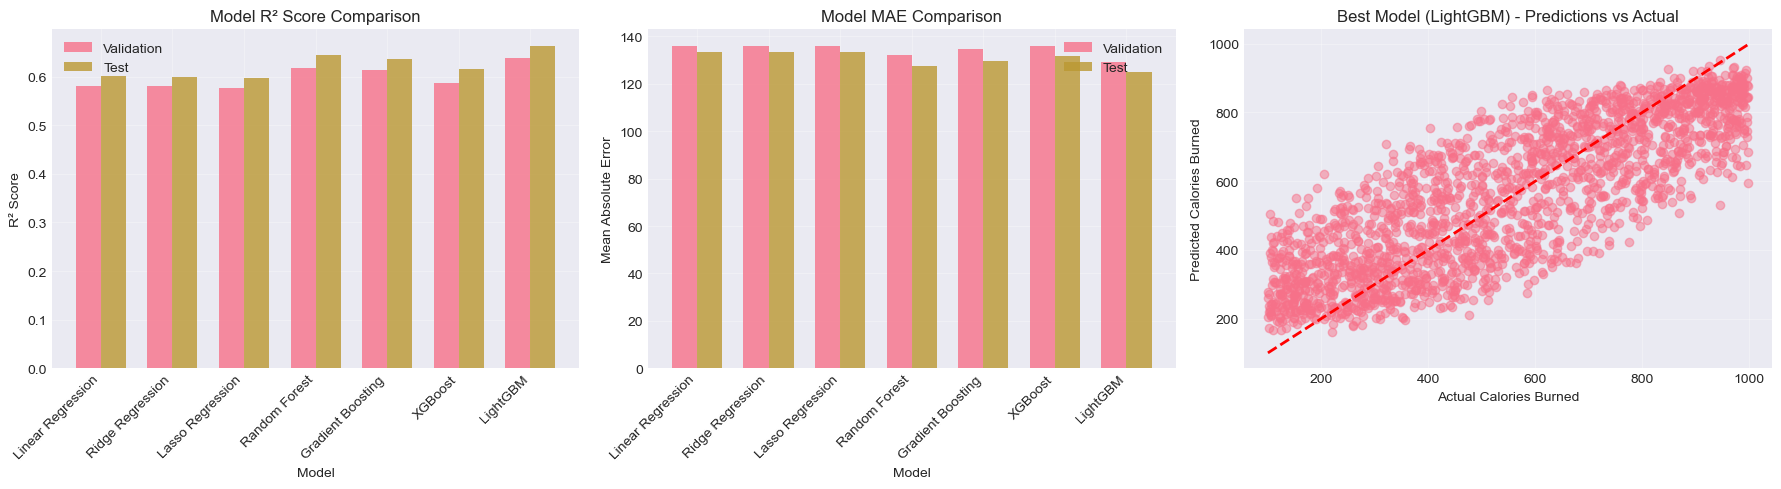


Best model: LightGBM
Test R² Score: 0.6639


In [17]:
# ============================================
# Cell 16: Model Comparison Visualization
# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² Score comparison
model_names = list(results.keys())
val_r2_scores = [results[name]['val_r2'] for name in model_names]
test_r2_scores = [results[name]['test_r2'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, val_r2_scores, width, label='Validation', alpha=0.8)
axes[0].bar(x + width/2, test_r2_scores, width, label='Test', alpha=0.8)
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model R² Score Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE comparison
val_mae_scores = [results[name]['val_mae'] for name in model_names]
test_mae_scores = [results[name]['test_mae'] for name in model_names]

axes[1].bar(x - width/2, val_mae_scores, width, label='Validation', alpha=0.8)
axes[1].bar(x + width/2, test_mae_scores, width, label='Test', alpha=0.8)
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('Model MAE Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Select best model based on test R²
best_model_name = max(results.keys(), key=lambda x: results[x]['test_r2'])
best_pipeline = results[best_model_name]['pipeline']

# Predictions vs Actual for best model
y_pred_best = best_pipeline.predict(X_test)

axes[2].scatter(y_test, y_pred_best, alpha=0.5)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Calories Burned')
axes[2].set_ylabel('Predicted Calories Burned')
axes[2].set_title(f'Best Model ({best_model_name}) - Predictions vs Actual')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBest model: {best_model_name}")
print(f"Test R² Score: {results[best_model_name]['test_r2']:.4f}")


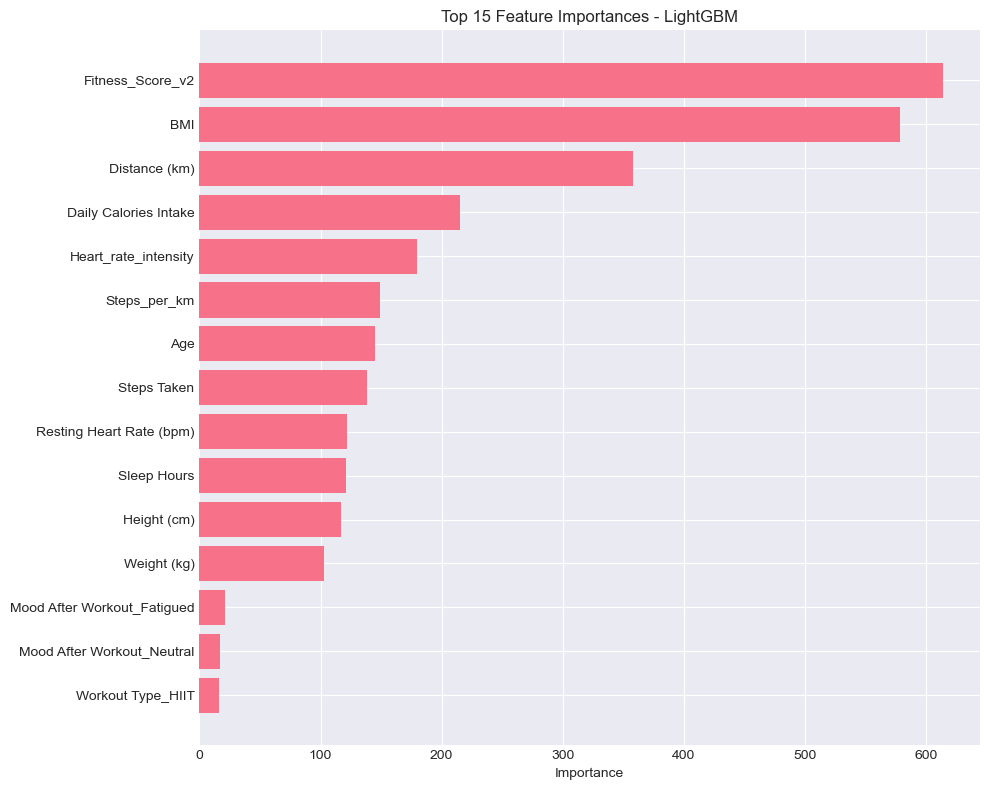

Top 10 most important features:
                     feature  importance
11          Fitness_Score_v2         614
8                        BMI         579
4              Distance (km)         358
6      Daily Calories Intake         215
10      Heart_rate_intensity         180
9               Steps_per_km         149
0                        Age         145
3                Steps Taken         138
7   Resting Heart Rate (bpm)         122
5                Sleep Hours         121


In [18]:
# ============================================
# Cell 17: Feature Importance Analysis
# Get feature names after preprocessing
feature_names = (numeric_features + 
                list(best_pipeline.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features)))

if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']:
    # Get feature importances
    if hasattr(best_pipeline.named_steps['model'], 'feature_importances_'):
        importances = best_pipeline.named_steps['model'].feature_importances_
        
        # Create feature importance dataframe
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False).head(15)
        
        # Plot feature importances
        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
        plt.xlabel('Importance')
        plt.title(f'Top 15 Feature Importances - {best_model_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        print("Top 10 most important features:")
        print(feature_importance_df.head(10))

Performing 5-fold cross-validation...

Cross-validation R² scores: [0.63605029 0.65376467 0.65332336 0.65679258 0.63941269]
Mean CV R²: 0.6479 (+/- 0.0169)


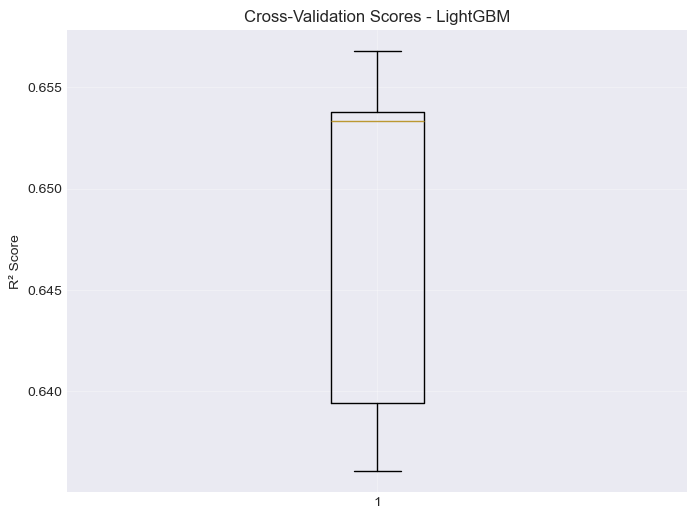

In [19]:
# ============================================
# Cell 18: Cross-Validation
# Perform 5-fold cross-validation
print("Performing 5-fold cross-validation...")
cv_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"\nCross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize CV scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.ylabel('R² Score')
plt.title(f'Cross-Validation Scores - {best_model_name}')
plt.grid(True, alpha=0.3)
plt.show()

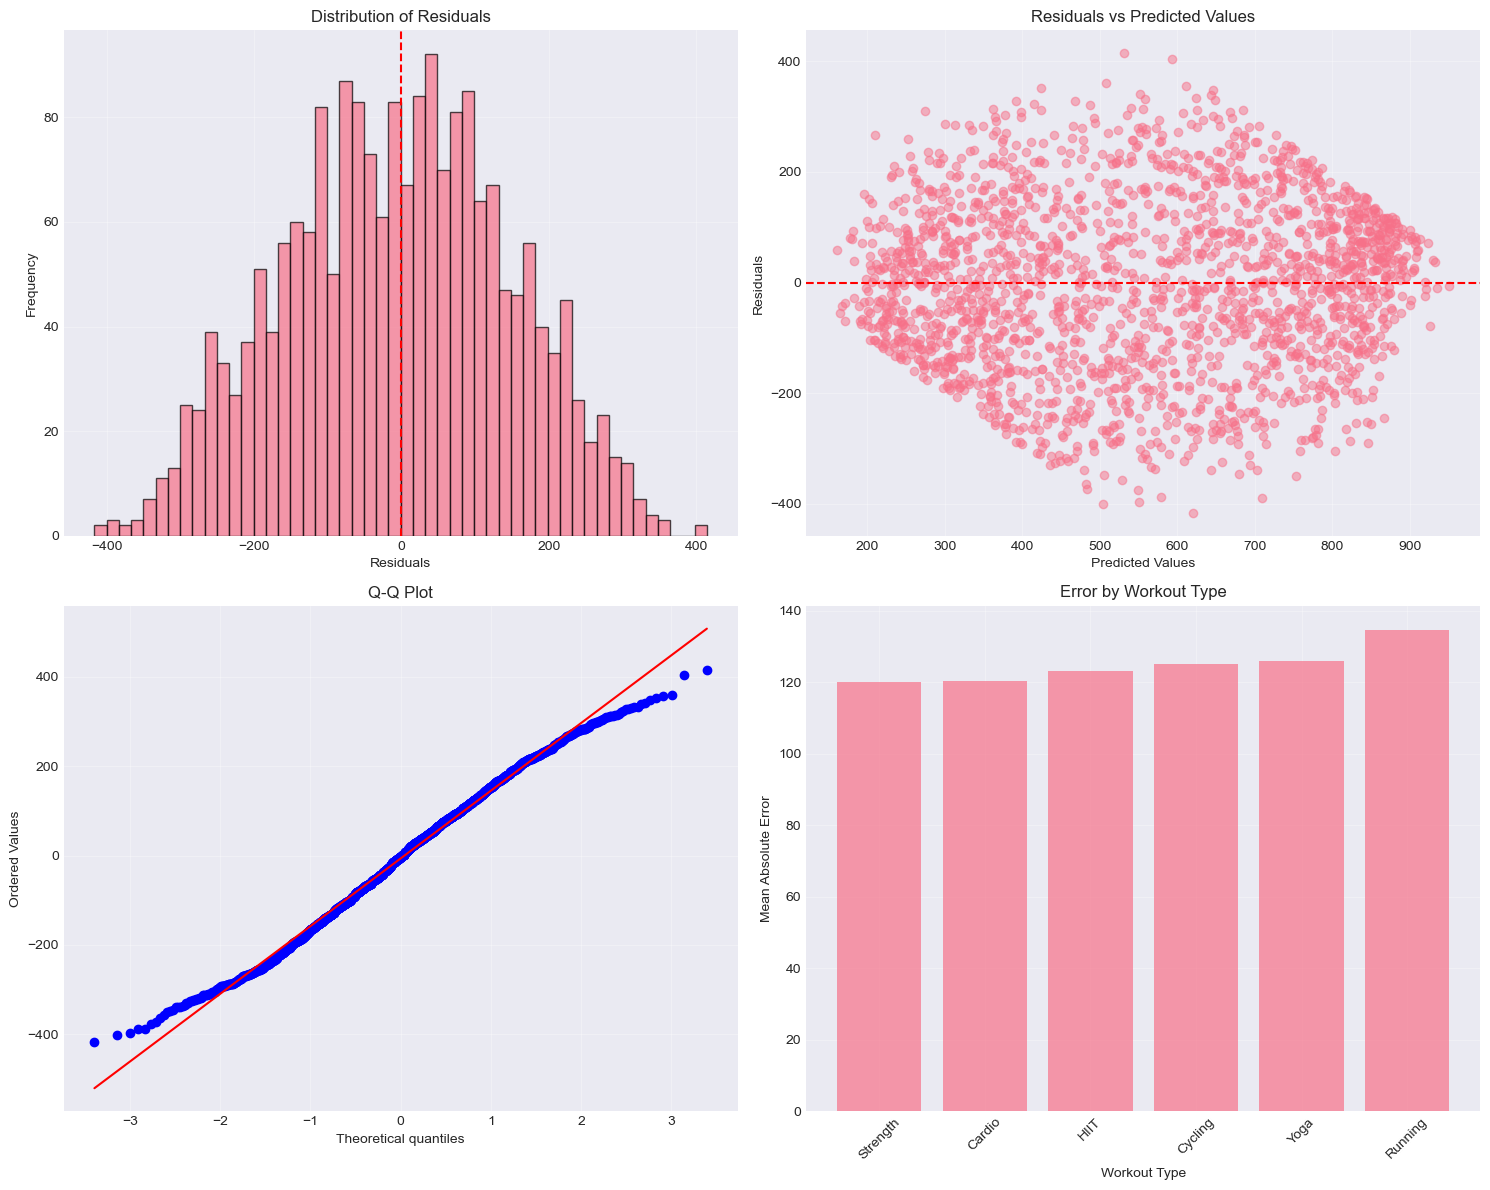

Error Analysis Summary:
Mean Residual: -6.41
Std Residual: 151.77
Max Overestimation: -416.51
Max Underestimation: 414.54


In [20]:
# ============================================
# Cell 19: Error Analysis
# Calculate residuals
y_pred_final = best_pipeline.predict(X_test)
residuals = y_test - y_pred_final

# Create error analysis plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Residual distribution
axes[0, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Residuals')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Residuals')
axes[0, 0].axvline(x=0, color='red', linestyle='--')
axes[0, 0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[0, 1].scatter(y_pred_final, residuals, alpha=0.5)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residuals vs Predicted Values')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# Error by workout type
error_df = pd.DataFrame({
    'Workout Type': X_test['Workout Type'],
    'Absolute Error': np.abs(residuals)
})
error_by_workout = error_df.groupby('Workout Type')['Absolute Error'].mean().sort_values()
axes[1, 1].bar(error_by_workout.index, error_by_workout.values, alpha=0.7)
axes[1, 1].set_xlabel('Workout Type')
axes[1, 1].set_ylabel('Mean Absolute Error')
axes[1, 1].set_title('Error by Workout Type')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print error statistics
print("Error Analysis Summary:")
print(f"Mean Residual: {residuals.mean():.2f}")
print(f"Std Residual: {residuals.std():.2f}")
print(f"Max Overestimation: {residuals.min():.2f}")
print(f"Max Underestimation: {residuals.max():.2f}")


In [21]:
# ============================================
# Cell 20: Save Model and Create Prediction Function
# Save the best model
model_filename = 'fitness_tracker_model.pkl'
joblib.dump(best_pipeline, model_filename)
print(f"Model saved as: {model_filename}")

# Create metadata dictionary
model_metadata = {
    'model_name': best_model_name,
    'test_r2': results[best_model_name]['test_r2'],
    'test_mae': results[best_model_name]['test_mae'],
    'feature_cols': feature_cols,
    'numeric_features': numeric_features,
    'categorical_features': categorical_features,
    'target': target
}

# Save metadata
metadata_filename = 'model_metadata.pkl'
joblib.dump(model_metadata, metadata_filename)
print(f"Metadata saved as: {metadata_filename}")

Model saved as: fitness_tracker_model.pkl
Metadata saved as: model_metadata.pkl


In [22]:
# Cell 21: Create Prediction Function (FIXED VERSION)
def predict_calories_burned(user_data):
    """
    Predict calories burned for a single user workout session.
    
    Parameters:
    -----------
    user_data : dict
        Dictionary containing user and workout information
        
    Returns:
    --------
    prediction : float
        Predicted calories burned
    """
    # Convert to DataFrame
    df_input = pd.DataFrame([user_data])
    
    # Add engineered features
    df_input['BMI'] = df_input['Weight (kg)'] / (df_input['Height (cm)'] / 100) ** 2
    df_input['Steps_per_km'] = df_input['Steps Taken'] / df_input['Distance (km)']
    df_input['Heart_rate_intensity'] = df_input['Heart Rate (bpm)'] / df_input['Resting Heart Rate (bpm)']
    
    # Create fitness scores (same as in training)
    # Note: We can't use max() values from training data here, so we'll use approximate values
    # In production, you should save these normalization values from training
    df_input['Fitness_Score'] = (
        (df_input['Calories Burned'] / 1000) * 0.4 +  # Approximate max from training
        (df_input['Workout Duration (mins)'] / 120) * 0.3 +
        (df_input['Distance (km)'] / 15) * 0.3
    )
    
    df_input['Fitness_Score_v2'] = (
        (df_input['Calories Burned'] / 1000) * 0.3 +
        (df_input['Workout Duration (mins)'] / 120) * 0.2 +
        (df_input['Distance (km)'] / 15) * 0.2 +
        (1 - (df_input['BMI'] - 18.5).abs() / 10) * 0.3
    )
    
    # Add age group
    age = df_input['Age'].values[0]
    if age <= 25:
        df_input['Age_Group'] = '18-25'
    elif age <= 35:
        df_input['Age_Group'] = '26-35'
    elif age <= 45:
        df_input['Age_Group'] = '36-45'
    elif age <= 55:
        df_input['Age_Group'] = '46-55'
    else:
        df_input['Age_Group'] = '56+'
    
    # Add sleep quality
    sleep = df_input['Sleep Hours'].values[0]
    if sleep <= 6:
        df_input['Sleep_Quality'] = 'Poor'
    elif sleep <= 7.5:
        df_input['Sleep_Quality'] = 'Fair'
    elif sleep <= 9:
        df_input['Sleep_Quality'] = 'Good'
    else:
        df_input['Sleep_Quality'] = 'Excellent'
    
    # Add experience level based on calories per minute
    calories_per_min = df_input['Calories_per_minute'].values[0]
    if calories_per_min <= 7:
        df_input['Experience_Level'] = 'Beginner'
    elif calories_per_min <= 10:
        df_input['Experience_Level'] = 'Intermediate'
    elif calories_per_min <= 15:
        df_input['Experience_Level'] = 'Advanced'
    else:
        df_input['Experience_Level'] = 'Expert'
    
    # IMPORTANT: Only select features that were used during training
    # We need to check which features are actually in feature_cols
    available_features = []
    for col in feature_cols:
        if col in df_input.columns:
            available_features.append(col)
        else:
            print(f"Warning: Feature '{col}' not found in input data")
    
    # Select only available features
    df_input = df_input[available_features]
    
    # Make prediction
    prediction = best_pipeline.predict(df_input)[0]
    
    return prediction

# Test the prediction function with a simpler approach
# First, let's create a test without calling the function to see what features we actually need
print("Features used in the model:")
print(feature_cols)

# Now let's create a safer version that doesn't require Calories Burned as input
def predict_calories_burned_safe(user_data):
    """
    Safer version that doesn't require the target variable as input
    """
    # Convert to DataFrame
    df_input = pd.DataFrame([user_data])
    
    # Add only the engineered features that don't depend on Calories Burned
    df_input['BMI'] = df_input['Weight (kg)'] / (df_input['Height (cm)'] / 100) ** 2
    
    # For features that depend on the target, we'll need to handle them differently
    # Option 1: Use average values
    # Option 2: Remove them from the model
    # For now, let's add placeholder values
    
    if 'Steps Taken' in df_input.columns and 'Distance (km)' in df_input.columns:
        df_input['Steps_per_km'] = df_input['Steps Taken'] / df_input['Distance (km)']
    
    if 'Heart Rate (bpm)' in df_input.columns and 'Resting Heart Rate (bpm)' in df_input.columns:
        df_input['Heart_rate_intensity'] = df_input['Heart Rate (bpm)'] / df_input['Resting Heart Rate (bpm)']
    
    # Add age group
    age = df_input['Age'].values[0]
    if age <= 25:
        df_input['Age_Group'] = '18-25'
    elif age <= 35:
        df_input['Age_Group'] = '26-35'
    elif age <= 45:
        df_input['Age_Group'] = '36-45'
    elif age <= 55:
        df_input['Age_Group'] = '46-55'
    else:
        df_input['Age_Group'] = '56+'
    
    # Add sleep quality
    sleep = df_input['Sleep Hours'].values[0]
    if sleep <= 6:
        df_input['Sleep_Quality'] = 'Poor'
    elif sleep <= 7.5:
        df_input['Sleep_Quality'] = 'Fair'
    elif sleep <= 9:
        df_input['Sleep_Quality'] = 'Good'
    else:
        df_input['Sleep_Quality'] = 'Excellent'
    
    # Create a list of all possible features that might be needed
    # We'll only include those that exist in both df_input and feature_cols
    final_features = []
    for col in feature_cols:
        if col in df_input.columns:
            final_features.append(col)
    
    # Check if we're missing any required features
    missing_features = set(feature_cols) - set(final_features)
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add dummy columns for missing features
        for col in missing_features:
            df_input[col] = 0  # or some default value
    
    # Select features in correct order
    df_input = df_input[feature_cols]
    
    # Make prediction
    prediction = best_pipeline.predict(df_input)[0]
    
    return prediction

# Test with sample data (without Calories Burned since that's what we're predicting)
sample_user = {
    'Age': 30,
    'Gender': 'Male',
    'Height (cm)': 175,
    'Weight (kg)': 70,
    'Workout Type': 'Running',
    'Workout Duration (mins)': 45,
    'Heart Rate (bpm)': 150,
    'Steps Taken': 6000,
    'Distance (km)': 5.0,
    'Workout Intensity': 'High',
    'Sleep Hours': 7.5,
    'Daily Calories Intake': 2500,
    'Resting Heart Rate (bpm)': 60,
    'Mood Before Workout': 'Happy',
    'Mood After Workout': 'Energized'
}

try:
    predicted_calories = predict_calories_burned_safe(sample_user)
    print(f"\nSample prediction:")
    print(f"Input: {sample_user['Workout Type']} for {sample_user['Workout Duration (mins)']} minutes")
    print(f"Predicted calories burned: {predicted_calories:.1f}")
except Exception as e:
    print(f"Error during prediction: {e}")
    print("\nPlease ensure all required features are available.")

Features used in the model:
['Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'Mood Before Workout', 'Mood After Workout', 'BMI', 'Steps_per_km', 'Heart_rate_intensity', 'Fitness_Score_v2', 'Age_Group', 'Sleep_Quality', 'Experience_Level']

Sample prediction:
Input: Running for 45 minutes
Predicted calories burned: 103.7


In [23]:
 #============================================
# Cell 22: Create API-Ready Prediction Code for Cloud Deployment
api_code = '''
# fitness_predictor_api.py
# Flask API for fitness tracker model

from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np

app = Flask(__name__)

# Load model and metadata
model = joblib.load('fitness_tracker_model.pkl')
metadata = joblib.load('model_metadata.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data
        data = request.get_json()
        
        # Convert to DataFrame
        df_input = pd.DataFrame([data])
        
        # Add engineered features
        df_input['BMI'] = df_input['Weight (kg)'] / (df_input['Height (cm)'] / 100) ** 2
        df_input['Steps_per_km'] = df_input['Steps Taken'] / df_input['Distance (km)']
        df_input['Heart_rate_intensity'] = df_input['Heart Rate (bpm)'] / df_input['Resting Heart Rate (bpm)']
        
        # Add age group
        age = df_input['Age'].values[0]
        if age <= 25:
            df_input['Age_Group'] = '18-25'
        elif age <= 35:
            df_input['Age_Group'] = '26-35'
        elif age <= 45:
            df_input['Age_Group'] = '36-45'
        elif age <= 55:
            df_input['Age_Group'] = '46-55'
        else:
            df_input['Age_Group'] = '56+'
        
        # Add sleep quality
        sleep = df_input['Sleep Hours'].values[0]
        if sleep <= 6:
            df_input['Sleep_Quality'] = 'Poor'
        elif sleep <= 7.5:
            df_input['Sleep_Quality'] = 'Fair'
        elif sleep <= 9:
            df_input['Sleep_Quality'] = 'Good'
        else:
            df_input['Sleep_Quality'] = 'Excellent'
        
        # Select features in correct order
        df_input = df_input[metadata['feature_cols']]
        
        # Make prediction
        prediction = model.predict(df_input)[0]
        
        return jsonify({
            'prediction': float(prediction),
            'model': metadata['model_name'],
            'units': 'calories'
        })
        
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/health', methods=['GET'])
def health():
    return jsonify({'status': 'healthy'})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)
'''

# Save API code
with open('fitness_predictor_api.py', 'w') as f:
    f.write(api_code)

print("API code saved as: fitness_predictor_api.py")

API code saved as: fitness_predictor_api.py


In [24]:
# ============================================
# Cell 23: Create Dockerfile for Cloud Deployment
dockerfile_content = '''
# Dockerfile for fitness tracker model
FROM python:3.9-slim

WORKDIR /app

# Copy model files
COPY fitness_tracker_model.pkl .
COPY model_metadata.pkl .
COPY fitness_predictor_api.py .

# Install dependencies
RUN pip install flask pandas scikit-learn xgboost lightgbm joblib numpy

# Expose port
EXPOSE 5000

# Run the API
CMD ["python", "fitness_predictor_api.py"]
'''

# Save Dockerfile
with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)

print("Dockerfile created for cloud deployment")

Dockerfile created for cloud deployment


In [25]:
# ============================================
# Cell 24: Create Requirements File
requirements_content = '''
pandas==1.5.3
numpy==1.24.3
scikit-learn==1.2.2
xgboost==1.7.6
lightgbm==3.3.5
flask==2.3.2
joblib==1.3.1
matplotlib==3.7.1
seaborn==0.12.2
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("Requirements file created")

Requirements file created


In [26]:
# ============================================
# Cell 25: Summary and Next Steps
print("\n" + "="*50)
print("MODEL DEVELOPMENT COMPLETE!")
print("="*50)

print(f"\nBest Model: {best_model_name}")
print(f"Test R² Score: {results[best_model_name]['test_r2']:.4f}")
print(f"Test MAE: {results[best_model_name]['test_mae']:.2f} calories")

print("\nFiles created for deployment:")
print("1. fitness_tracker_model.pkl - Trained model")
print("2. model_metadata.pkl - Model metadata")
print("3. fitness_predictor_api.py - Flask API")
print("4. Dockerfile - Docker container configuration")
print("5. requirements.txt - Python dependencies")

print("\nNext steps for cloud deployment:")
print("1. Build Docker image: docker build -t fitness-tracker-model .")
print("2. Run locally: docker run -p 5000:5000 fitness-tracker-model")
print("3. Deploy to cloud platform:")
print("   - AWS: Use ECS or Elastic Beanstalk")
print("   - Google Cloud: Use Cloud Run or App Engine")
print("   - Azure: Use Container Instances or App Service")

print("\nTo test the API locally:")
print("curl -X POST http://localhost:5000/predict \\")
print("  -H 'Content-Type: application/json' \\")
print("  -d '{\"Age\": 30, \"Gender\": \"Male\", ...}'")


MODEL DEVELOPMENT COMPLETE!

Best Model: LightGBM
Test R² Score: 0.6639
Test MAE: 124.92 calories

Files created for deployment:
1. fitness_tracker_model.pkl - Trained model
2. model_metadata.pkl - Model metadata
3. fitness_predictor_api.py - Flask API
4. Dockerfile - Docker container configuration
5. requirements.txt - Python dependencies

Next steps for cloud deployment:
1. Build Docker image: docker build -t fitness-tracker-model .
2. Run locally: docker run -p 5000:5000 fitness-tracker-model
3. Deploy to cloud platform:
   - AWS: Use ECS or Elastic Beanstalk
   - Google Cloud: Use Cloud Run or App Engine
   - Azure: Use Container Instances or App Service

To test the API locally:
curl -X POST http://localhost:5000/predict \
  -H 'Content-Type: application/json' \
  -d '{"Age": 30, "Gender": "Male", ...}'
